# Financial Planning with APIs and Simulations

This project will have two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv('KEYS.env')

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))
    

{
    "data": {
        "1": {
            "circulating_supply": 19311162,
            "id": 1,
            "last_updated": 1678222792,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 427030947163,
                    "percent_change_1h": -0.685271340192745,
                    "percent_change_24h": -1.3891905633668,
                    "percent_change_7d": -6.23596052344606,
                    "percentage_change_1h": -0.685271340192745,
                    "percentage_change_24h": -1.3891905633668,
                    "percentage_change_7d": -6.23596052344606,
                    "price": 22052.0,
                    "volume_24h": 26585169726
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19311162,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120473820,
            "id": 1027,
            "last_updated": 1678222799,
            "max_supply": 120473820,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 186915492538,
                    "percent_change_1h": -0.502211681958124,
                    "percent_change_24h": -0.79923003459851,
                    "percent_change_7d": -5.25645214882227,
                    "percentage_change_1h": -0.502211681958124,
                    "percentage_change_24h": -0.79923003459851,
                    "percentage_change_7d": -5.25645214882227,
                    "price": 1548.09,
                    "volume_24h": 8134429633
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120473820,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_c

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
btc_price


22052.0

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
eth_price


1548.09

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
btc_value


26462.399999999998

In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
eth_value


8204.876999999999

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


34667.276999999995

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Financial_Planning_Projections` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Financial_Planning_Projections` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_API = os.getenv('ALPACA_API_KEY')
alpaca_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_API, 
    alpaca_key,
    api_version='v2'
)


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY','AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Get current date and time in New York timezone
current_date = pd.Timestamp.now(tz='America/New_York')

# Set both the start and end date at the date of your prior business weekday to get closing price of the previous trading day
start_date = current_date - pd.offsets.BDay(1)
end_date = start_date

#Format start and end dates as ISO format
start_date_iso = start_date.date().isoformat()
end_date_iso = end_date.date().isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Set the `df` property after the function to format the response object as a DataFrame
closing_price = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date.date(),
    end=end_date.date()
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = closing_price[closing_price['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = closing_price[closing_price['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
closing_price = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Review the first 5 rows of the Alpaca DataFrame
closing_price.head()


AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-03-06 05:00:00+00:00  97.27  97.29  96.81  96.84  4188489       20310   

                                       SPY                                    \
                              vwap    open    high     low   close    volume   
timestamp                                                                      
2023-03-06 05:00:00+00:00  96.9585  405.05  407.45  404.01  404.47  72795946   

                                                   
                          trade_count        vwap  
timestamp                                          
2023-03-06 05:00:00+00:00      539397  405.429475

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(closing_price['AGG']['close'][0])

# Print the AGG closing price
agg_close_price


96.84

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(closing_price['SPY']['close'][0])


# Print the SPY closing price
spy_close_price


404.47

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
agg_value


19368.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
spy_value


44491.700000000004

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


63859.700000000004

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
total_portfolio


98526.977

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data
savings_data

[34667.276999999995, 63859.700000000004]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savins_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto','stock/bond'])

# Display the savings_df DataFrame
savins_df


,amount
crypto,34667.277
stock/bond,63859.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`.

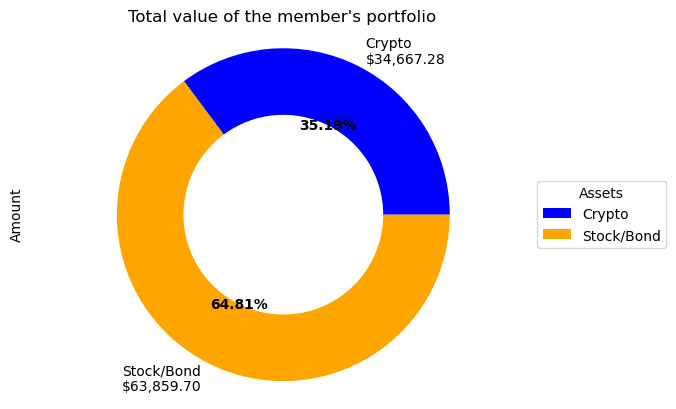

In [25]:
# Create a list of asset names
assets = ['Crypto', 'Stock/Bond']

# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
fig, ax = plt.subplots()

# Create the pie chart
wedges, texts, autotexts = ax.pie(
    savins_df['amount'],
    wedgeprops=dict(width=0.4), # specify the width of the donut hole
    shadow=False, 
    explode=(0, 0,), 
    colors=['blue','orange'],
    autopct='%1.2f%%', # add percentage labels
)

# Add labels and values to the chart
ax.legend(wedges, assets,
          title="Assets",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust the font size and weight of the percentage labels
plt.setp(
    autotexts,
    size=10, 
    weight="bold"
)

# Add the asset name and value to each label
for i, text in enumerate(texts):
    text.set_text(f"{assets[i]}\n${savins_df['amount'][i]:,.2f}")

plt.title("Total value of the member's portfolio")
ax.set_ylabel('Amount')
plt.axis('equal') # make the chart circular
plt.show()

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations, you have enough money in your emergency fund!')
elif total_portfolio == emergency_fund_value:
    print('Congratulations on reaching your emergency fund, an important financial goal!')
else:
    print(f'You are ${emergency_fund_value - total_portfolio:,.2f} dollars away from reaching your emergency fund financial goal')


Congratulations, you have enough money in your emergency fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
start_date = pd.Timestamp.now(tz='America/New_York').date() - pd.DateOffset(years=3)
end_date = pd.Timestamp.now(tz='America/New_York').date()

# Set both the start and end date at the date of your prior business weekday 
# This will give you the closing price of the previous trading day
start_date = start_date - pd.tseries.offsets.BDay()
end_date = end_date - pd.tseries.offsets.BDay()

# Format current date as ISO format
today = end_date.isoformat()

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters have been set already above. 
# The start and end dates should be updated with the information set above
# Add the df property to the end of the call so the response is returned as a DataFrame
historical_closing_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date.date(),
    end=end_date.date()
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = historical_closing_prices_df[historical_closing_prices_df['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = historical_closing_prices_df[historical_closing_prices_df['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
historical_closing_prices_df = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display both the first and last five rows of the DataFrame
display(historical_closing_prices_df.head())
historical_closing_prices_df.tail()


AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2020-03-06 05:00:00+00:00  118.18  118.265  117.50  117.86  17456408   
2020-03-09 04:00:00+00:00  119.27  119.270  117.00  117.71  13666699   
2020-03-10 04:00:00+00:00  117.41  117.680  116.17  116.38  18694073   
2020-03-11 04:00:00+00:00  116.70  116.790  114.55  114.72  13342359   
2020-03-12 04:00:00+00:00  113.98  114.750  109.06  113.05  18684755   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2020-03-06 05:00:00+00:00       53640  117.881014  293.15  298.78  290.23   
2020-03-09 04:00:00+00:00       48155  118.082038  275.30  284.19  273.45   
2020-03-10 04:00:00+00:00       46652  116.943446  284.64  288.52  273.50   
2020-03-11 04:00:00+00:00       43941  115.675751  280.70  281.94  270.88   
2020-03-12 04:00:00+00:00       61313  111.916775  256.00  266.66  247.68   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-03-06 05:00:00+00:00  297.43  228918131     1642906  295.257537  
2020-03-09 04:00:00+00:00  276.32  309425747     2577867  280.319722  
2020-03-10 04:00:00+00:00  288.41  276444058     2516868  281.131339  
2020-03-11 04:00:00+00:00  274.25  256678789     2152461  277.627436  
2020-03-12 04:00:00+00:00  255.24  392221671     3709928  255.696186

AGG                                              \
                             open   high      low  close   volume trade_count   
timestamp                                                                       
2023-02-28 05:00:00+00:00  96.992  97.37  96.9291  97.31  8575033       25262   
2023-03-01 05:00:00+00:00  96.830  97.04  96.5000  96.52  9125358       27776   
2023-03-02 05:00:00+00:00  96.150  96.35  96.1100  96.32  9247374       27922   
2023-03-03 05:00:00+00:00  96.850  97.08  96.5900  97.08  7266999       23993   
2023-03-06 05:00:00+00:00  97.270  97.29  96.8100  96.84  4188489       20310   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-02-28 05:00:00+00:00  97.229794  397.23  399.28  396.15  396.26   
2023-03-01 05:00:00+00:00  96.626343  395.41  396.69  393.38  394.74   
2023-03-02 05:00:00+00:00  96.246987  392.68  398.69  392.33  397.81   
2023-03-03 05:00:00+00:00  96.895506  399.71  404.45  399.03  404.19   
2023-03-06 05:00:00+00:00  96.958500  405.05  407.45  404.01  404.47   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-02-28 05:00:00+00:00  96461172      601272  397.419803  
2023-03-01 05:00:00+00:00  99723518      699672  395.137160  
2023-03-02 05:00:00+00:00  85442636      612955  395.427267  
2023-03-03 05:00:00+00:00  90119952      645491  402.059203  
2023-03-06 05:00:00+00:00  72795946      539397  405.429475

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [54]:
#historical_closing_prices_df['AGG']['open']
historical_closing_prices_df.AGG.open

timestamp
2020-03-06 05:00:00+00:00    118.180
2020-03-09 04:00:00+00:00    119.270
2020-03-10 04:00:00+00:00    117.410
2020-03-11 04:00:00+00:00    116.700
2020-03-12 04:00:00+00:00    113.980
                              ...   
2023-02-28 05:00:00+00:00     96.992
2023-03-01 05:00:00+00:00     96.830
2023-03-02 05:00:00+00:00     96.150
2023-03-03 05:00:00+00:00     96.850
2023-03-06 05:00:00+00:00     97.270
Name: open, Length: 755, dtype: float64

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY. Annualize by 252 trading days.
# Run 500 samples.
MC_30_years_40_60_weights = MCSimulation(
    portfolio_data = historical_closing_prices_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

# Review the simulation input data
MC_30_years_40_60_weights.portfolio_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2020-03-06 05:00:00+00:00  118.18  118.265  117.50  117.86  17456408   
2020-03-09 04:00:00+00:00  119.27  119.270  117.00  117.71  13666699   
2020-03-10 04:00:00+00:00  117.41  117.680  116.17  116.38  18694073   
2020-03-11 04:00:00+00:00  116.70  116.790  114.55  114.72  13342359   
2020-03-12 04:00:00+00:00  113.98  114.750  109.06  113.05  18684755   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-03-06 05:00:00+00:00       53640  117.881014          NaN  293.15   
2020-03-09 04:00:00+00:00       48155  118.082038    -0.001273  275.30   
2020-03-10 04:00:00+00:00       46652  116.943446    -0.011299  284.64   
2020-03-11 04:00:00+00:00       43941  115.675751    -0.014264  280.70   
2020-03-12 04:00:00+00:00       61313  111.916775    -0.014557  256.00   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2020-03-06 05:00:00+00:00  298.78  290.23  297.43  228918131     1642906   
2020-03-09 04:00:00+00:00  284.19  273.45  276.32  309425747     2577867   
2020-03-10 04:00:00+00:00  288.52  273.50  288.41  276444058     2516868   
2020-03-11 04:00:00+00:00  281.94  270.88  274.25  256678789     2152461   
2020-03-12 04:00:00+00:00  266.66  247.68  255.24  392221671     3709928   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-03-06 05:00:00+00:00  295.257537          NaN  
2020-03-09 04:00:00+00:00  280.319722    -0.070975  
2020-03-10 04:00:00+00:00  281.131339     0.043754  
2020-03-11 04:00:00+00:00  277.627436    -0.049097  
2020-03-12 04:00:00+00:00  255.696186    -0.069316

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years_40_60_weights.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/lexx/Desktop/Github_Upload/5_API/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998749,1.000703,1.009834,1.012626,1.012354,0.986035,1.016852,1.013895,1.001059,0.989681,...,1.004335,0.984869,0.999252,1.001007,0.992265,0.988810,1.008588,1.000439,1.023026,1.009588
2,1.000976,1.001450,1.010266,1.020582,1.028226,0.989326,1.020530,1.005944,0.998835,0.993621,...,1.019317,0.978526,1.008653,1.009925,0.987598,1.000176,1.027142,1.002436,1.022697,1.009084
3,1.008847,1.000736,0.999468,1.014828,1.034233,0.996793,1.038220,1.010433,1.013202,0.990080,...,1.000813,0.977833,1.016434,1.002483,1.003674,0.989373,1.031958,1.014092,1.010967,1.000818
4,1.014482,0.991638,1.004413,1.023014,1.027986,0.999171,1.031584,1.013991,1.021628,0.986249,...,1.000986,0.976273,1.010148,1.008024,1.006901,0.983479,1.034051,1.011432,0.985674,1.016369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.986045,1.919589,4.658095,1.311604,5.989914,7.085719,47.511708,6.789583,6.618576,1.208909,...,7.853349,1.697007,3.873521,5.594018,1.695759,16.100417,20.505449,1.542980,0.993348,4.606908
7557,5.035359,1.919068,4.566720,1.304593,5.966089,7.009504,47.123220,6.787919,6.620456,1.213847,...,7.813657,1.696740,3.871176,5.583275,1.663525,15.880645,20.635874,1.553282,0.995017,4.633312
7558,4.989144,1.958607,4.584910,1.318518,5.897843,6.994089,47.037255,6.807552,6.557862,1.206909,...,7.765050,1.729851,3.879101,5.595419,1.661396,15.820584,21.057908,1.564126,0.988565,4.579864
7559,4.963630,1.978360,4.587990,1.307277,5.828522,6.946963,46.731897,6.876875,6.609557,1.211364,...,7.686605,1.739347,3.851229,5.630962,1.659525,15.810930,21.153323,1.570877,0.981697,4.625404


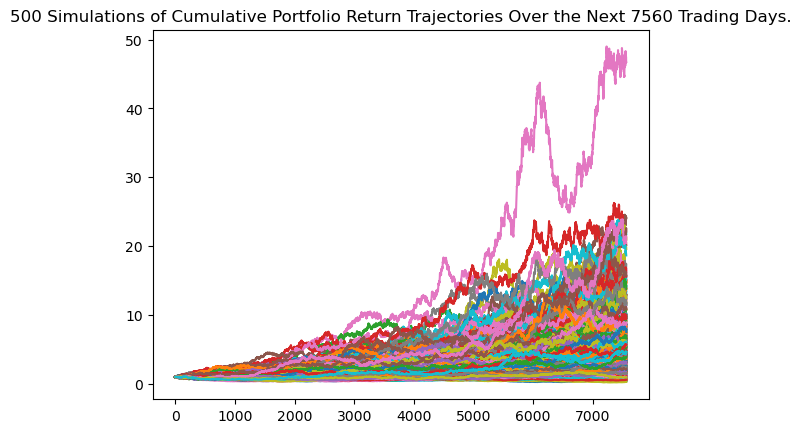

In [46]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_30_years_40_60_weights_line_plot = MC_30_years_40_60_weights.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

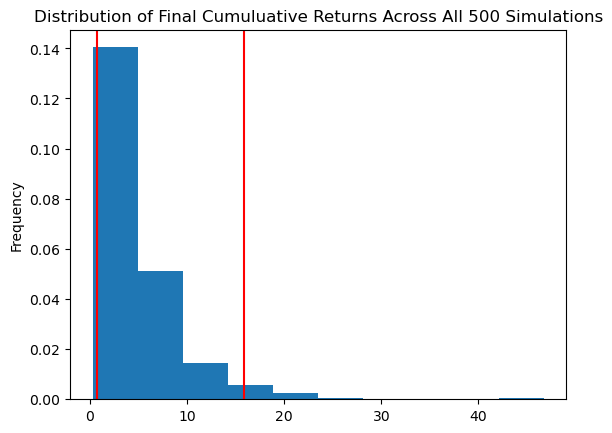

In [47]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_30_years_40_60_weights_hystogram_plot = MC_30_years_40_60_weights.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [48]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_30_years_40_60_weights_summary = MC_30_years_40_60_weights.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_30_years_40_60_weights_summary)

count           500.000000
mean              4.853643
std               4.402019
min               0.292565
25%               2.034270
50%               3.664394
75%               6.148233
max              46.721630
95% CI Lower      0.706229
95% CI Upper     15.859076
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [49]:
# Print the current balance of the stock and bond portion of the members portfolio
#print('The current value of stoks and bond portfolio: ${:,.2f}'.format(total_stocks_bonds))
print(f'the current blah ${total_stocks_bonds}')

the current blah $63859.700000000004


In [50]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_30_years_40_60_weights_summary[8] * total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(MC_30_years_40_60_weights_summary[9] * total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is 95% chance that an initial value of ${total_stocks_bonds:,.2f} in the currret stock and bond portfolio"
      f" in the next 30 years will end with in the range of ${ci_lower_thirty_cumulative_return} and {ci_upper_thirty_cumulative_return}")


There is 95% chance that an initial value of $63,859.70 in the currret stock and bond portfolio in the next 30 years will end with in the range of $45099.57 and 1012755.84


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [55]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10_years_20_80_weights = MCSimulation(
    portfolio_data = historical_closing_prices_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252 * 10
)
# Review the simulation input data
MC_10_years_20_80_weights.portfolio_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2020-03-06 05:00:00+00:00  118.18  118.265  117.50  117.86  17456408   
2020-03-09 04:00:00+00:00  119.27  119.270  117.00  117.71  13666699   
2020-03-10 04:00:00+00:00  117.41  117.680  116.17  116.38  18694073   
2020-03-11 04:00:00+00:00  116.70  116.790  114.55  114.72  13342359   
2020-03-12 04:00:00+00:00  113.98  114.750  109.06  113.05  18684755   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-03-06 05:00:00+00:00       53640  117.881014          NaN  293.15   
2020-03-09 04:00:00+00:00       48155  118.082038    -0.001273  275.30   
2020-03-10 04:00:00+00:00       46652  116.943446    -0.011299  284.64   
2020-03-11 04:00:00+00:00       43941  115.675751    -0.014264  280.70   
2020-03-12 04:00:00+00:00       61313  111.916775    -0.014557  256.00   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2020-03-06 05:00:00+00:00  298.78  290.23  297.43  228918131     1642906   
2020-03-09 04:00:00+00:00  284.19  273.45  276.32  309425747     2577867   
2020-03-10 04:00:00+00:00  288.52  273.50  288.41  276444058     2516868   
2020-03-11 04:00:00+00:00  281.94  270.88  274.25  256678789     2152461   
2020-03-12 04:00:00+00:00  266.66  247.68  255.24  392221671     3709928   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-03-06 05:00:00+00:00  295.257537          NaN  
2020-03-09 04:00:00+00:00  280.319722    -0.070975  
2020-03-10 04:00:00+00:00  281.131339     0.043754  
2020-03-11 04:00:00+00:00  277.627436    -0.049097  
2020-03-12 04:00:00+00:00  255.696186    -0.069316

In [56]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years_20_80_weights.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/lexx/Desktop/Github_Upload/5_API/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986321,1.008887,1.014065,0.980215,1.008445,0.995446,0.995974,1.019433,0.987032,0.992969,...,1.004403,1.005264,1.025851,0.979553,0.998960,0.984409,1.003624,0.991449,1.018432,0.996629
2,0.985691,1.021062,1.010661,0.987831,1.014078,0.973015,0.980954,1.028396,1.010188,0.993843,...,0.995399,1.022419,1.022122,0.973935,1.000057,0.976570,1.012208,0.979474,1.012738,1.000853
3,0.999922,1.018343,1.009117,0.982973,1.009780,0.980240,0.980087,1.038884,1.024535,0.990177,...,0.995679,1.003056,1.027427,0.967356,1.024222,0.976161,1.026144,0.991722,1.034391,0.984408
4,0.994955,1.019104,0.991330,0.993786,1.018895,0.968217,0.957694,1.034115,1.025742,0.979077,...,0.985129,1.011973,1.035625,0.975114,1.018748,0.966869,1.033569,0.995835,1.055109,0.969345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.833950,2.672216,1.040418,1.125615,3.825146,2.415219,2.033220,1.528920,2.924048,2.146735,...,1.439095,0.719916,0.771707,2.293262,1.031157,2.646484,4.859116,1.612252,0.968390,0.766903
2517,1.841000,2.666205,1.032831,1.106280,3.826503,2.384152,2.041014,1.570955,2.994308,2.176157,...,1.442021,0.714105,0.765375,2.340387,1.037118,2.617728,4.809828,1.596359,0.966124,0.787108
2518,1.850929,2.714822,1.060617,1.090115,3.871967,2.380447,2.045847,1.589584,3.001974,2.149115,...,1.438415,0.713597,0.769565,2.354321,1.027877,2.631423,4.789008,1.590685,0.952974,0.773534
2519,1.848546,2.729401,1.060552,1.081131,3.858435,2.404696,2.055756,1.596460,3.017475,2.201379,...,1.458369,0.715063,0.772290,2.380771,1.005375,2.610915,4.788994,1.588025,0.939210,0.773578


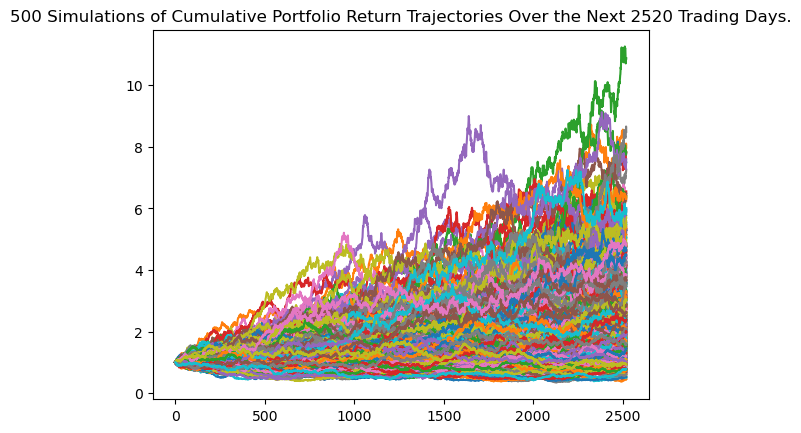

In [59]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_years_20_80_weights_line_plot = MC_10_years_20_80_weights.plot_simulation()


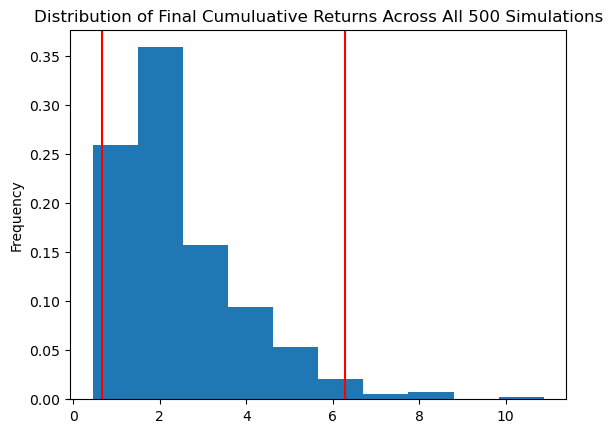

In [61]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_years_20_80_weights_line_plot_hystogram_plot = MC_10_years_20_80_weights.plot_distribution()

In [68]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_years_20_80_weights_summary = MC_10_years_20_80_weights.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_10_years_20_80_weights_summary)


count           500.000000
mean              2.453089
std               1.489691
min               0.452077
25%               1.426529
50%               2.026193
75%               3.097034
max              10.878341
95% CI Lower      0.673786
95% CI Upper      6.287644
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [69]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'The current value of stoks and bond portfolio: ${round(total_stocks_bonds,2)}')


The current value of stoks and bond portfolio: $63859.7


In [72]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_10_years_20_80_weights_summary[8] * total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(MC_10_years_20_80_weights_summary[9] * total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is 95% chance that an initial value of ${total_stocks_bonds:,.2f} in the currret stock and bond portfolio"
      f" in the next 10 years will end with in the range of ${ci_lower_ten_cumulative_return} and {ci_upper_ten_cumulative_return}")

There is 95% chance that an initial value of $63,859.70 in the currret stock and bond portfolio in the next 10 years will end with in the range of $43027.75 and 401527.08


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [ ]:
range of $45099.57 and 1012755.84   ange of $43027.75 and 401527.08